# Inferência Estatística (GCC1625) - Trabalho 2
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo: https://www.youtube.com/watch?v=nry4Lgep4rU

# (1) Máquina Desregulada?

Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada garrafa com 500 ml de vinho. O fabricante suspeita de que essa máquina está preenchendo as garrafas com valores a menos. Ele então coleta uma amostra de 20 garrafas preenchidas a partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados obtidos nessas medições estão a seguir (valores em miligramas):


484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59,
502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27

Nessa parte do trabalho você deve verificar a alegação de que a máquina está desregulada, conforme a suspeita do fabricante.

#### (i) Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamos em nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição aproximadamente normal. Para a amostra fornecida verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste usando QQ-plot. Nessa verificação defina o nível de significância como α = 0.05.

In [1]:
# imports iniciais
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
import pandas as pd



Estatística de Shapiro-Wilk: 0.9733
P-valor: 0.8223
Não rejeitamos H0: A amostra parece vir de uma distribuição normal.


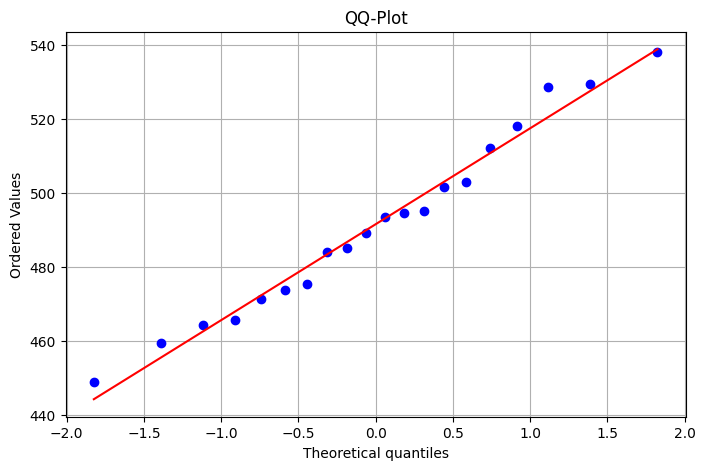

In [ ]:
# teste de shapiro-wilk
dados = [
    484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59,
    502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27
]

shapiro_stat, shapiro_p = stats.shapiro(dados)
print(f'Estatística de Shapiro-Wilk: {shapiro_stat:.4f}')
print(f'P-valor: {shapiro_p:.4f}')
alpha = 0.05
if shapiro_p > alpha:
    print("Não rejeitamos H0: A amostra parece vir de uma distribuição normal.")
else:
    print("Rejeitamos H0: A amostra não parece vir de uma distribuição normal.")
    
#qqplot
plt.figure(figsize=(8, 5))
stats.probplot(dados, dist="norm", plot=plt)
plt.title('QQ-Plot')
plt.grid(True)
plt.show()


**Explicação:**

Com base no teste de Shapiro-Wilk, observamos o valor-p obtido para verificar a hipótese de que os dados seguem uma distribuição normal. Se esse valor-p for maior que o nível de significância adotado (α = 0.05), não rejeitamos a hipótese nula, o que sugere que os dados não apresentam evidências significativas de desvio da normalidade. Complementarmente, o QQ-Plot nos permite uma verificação visual: se os pontos estiverem aproximadamente alinhados sobre a reta, isso reforça a ideia de que os dados podem ser considerados normalmente distribuídos. A concordância entre ambos os métodos fortalece a conclusão sobre a distribuição dos dados.


#### (ii) Agora, aplique o teste de hipóteses. Repare que a variância da população é desconhecida; sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%. Apresente e descreva claramente a aplicação dos quatro passos do procedimento.

**Passo 1: Definir as hipóteses**

- H₀ (hipótese nula): μ = 500 (a média de preenchimento é 500 ml) -> não há defeito
- H₁ (hipótese alternativa): μ < 500 (a média de preenchimento é menor que 500 ml) -> defeito


**Passo 2: Computar a estatística de Teste**

Como a variância da população é desconhecida e a amostra é pequena (n < 30), utilizamos o **teste t para uma amostra**, pois H₀: μ = μ₀:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

onde:
- $\bar{x}$ = média amostral
- $\mu_0$ = média populacional sob H₀ (500 ml)
- $s$ = desvio padrão amostral
- $n$= tamanho da amostra


**Passo 3: Computar o $p$-valor associado à estatística de teste**

 O cálculo do valor-p depende da **direção do teste de hipóteses**:

- **Teste unilateral à esquerda ($H_1: \mu < \mu_0$):**  
  $$ p\text{-valor} = P(T \leq t_{\text{calculado}}) = \text{t.cdf}(t_{\text{calculado}}, df) $$

- **Teste unilateral à direita ($H_1: \mu > \mu_0$):**  
  $$ p\text{-valor} = P(T \geq t_{\text{calculado}}) = 1 - \text{t.cdf}(t_{\text{calculado}}, df) $$

- **Teste bilateral ($H_1: \mu \neq \mu_0$):**  
  $$ p\text{-valor} = 2 \cdot P(T \geq |t_{\text{calculado}}|) = 2 \cdot \left(\text{t.cdf}(-|t_{\text{calculado}}|, df)\right) $$


Onde:
- `t_calculado` é a estatística de teste obtida -> t score
- `df` é o número de graus de liberdade da amostra ($n - 1$)


**Passo 4: Interpretar e declarar o resultado**

Se $p\text{-valor} < \alpha$, rejeitamos $H_0$.
Em caso contrário, falhamos em rejeitar $H_0$.


In [17]:
# código

# estatisticas
media_amostral = np.mean(dados)
desvio_padrao = np.std(dados, ddof=1)
n = len(dados)
mu0 = 500
alpha = 0.01

# passo 2
# t
t_score = (media_amostral - mu0) / (desvio_padrao / np.sqrt(n))

# passo 3
# p-valor
p_valor = t.cdf(t_score, df=n-1)

print(f'Média amostral: {media_amostral:.2f}')
print(f'T-score: {t_score:.4f}')
print(f'P-valor: {p_valor:.4f}')
print("Decisão:")
# passo 4
if p_valor < alpha:
    print("Rejeitar a hipótese nula")
else:
    print("Falha ao rejeitar a hipótese nula")


Média amostral: 491.57
T-score: -1.5205
P-valor: 0.0724
Decisão:
Falha ao rejeitar a hipótese nula


**Explicação:** Os passos descritos anteriormente são executados pelo código acima, avaliando se a média de uma amostra é estatisticamente igual a um valor específico (média populacional). 

São definidas, inicialmente, média amostral, desvio padrão amostral, tamanho da amostra, média populacional (500) e alpha. 

Com isso, com a fórmula descrita anteriormente, é calculado o t_score e, depois, o p-valor com t.cdf() (t-Student). 

Por fim, comparamos o p-valor obtido com o valor de alpha. Como p-valor não é menor que o alpha, podemos afirmar que falhamos em rejeitar a hipótese nula, ou seja, $H_0$ não é rejeitada.

# (2) Um estilo diferente ajuda?

O conjunto de dados fornecido no arquivo golfe.csv lista as pontuações de uma rodada para 75 membros selecionados aleatoriamente em um campo de golfe, primeiro usando seus próprios tacos originais e, dois meses depois, usando novos tacos com um estilo (design) experimental. Queremos verificar a alegação de que esse novo estilo de taco ajuda no desempenho dos jogadores.

In [3]:
# lendo o arquivo golfe.csv
import scipy.stats as stats
import pandas as pd
df = pd.read_csv("golfe.csv", sep=';')

#### (i) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [ ]:
# código

#função para aplicar os dois testes de normalidade
def verificar_normalidade(amostra, nome_coluna, alpha=0.05):
    print(f"\nVerificando normalidade para: {nome_coluna}")

    #teste de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(amostra)
    print(f"  Shapiro-Wilk       -> Estatística = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")
    if p_shapiro > alpha:
        print("    Não rejeitamos H0: distribuição é aproximadamente normal.")
    else:
        print("    Rejeitamos H0: a distribuição não é normal.")

    #teste de D’Agostino
    stat_dagostino, p_dagostino = stats.normaltest(amostra)
    print(f"  D’Agostino-Pearson -> Estatística = {stat_dagostino:.4f}, p-valor = {p_dagostino:.4f}")
    if p_dagostino > alpha:
        print("    Não rejeitamos H0: distribuição é aproximadamente normal.")
    else:
        print("    Rejeitamos H0: a distribuição não é normal.")

#aplicar os testes para cada conjunto de dados
old_score = df['Old Score']
new_score = df['New Score ']
verificar_normalidade(old_score, 'Old Score')
verificar_normalidade(new_score, 'New Score ')



Verificando normalidade para: Old Score
  Shapiro-Wilk       -> Estatística = 0.9005, p-valor = 0.0000
    Rejeitamos H0: a distribuição não é normal.
  D’Agostino-Pearson -> Estatística = 26.9249, p-valor = 0.0000
    Rejeitamos H0: a distribuição não é normal.

Verificando normalidade para: New Score 
  Shapiro-Wilk       -> Estatística = 0.9188, p-valor = 0.0001
    Rejeitamos H0: a distribuição não é normal.
  D’Agostino-Pearson -> Estatística = 15.0063, p-valor = 0.0006
    Rejeitamos H0: a distribuição não é normal.


**Explicação:**

A função verifica_normalidade recebe 3 parâmetros: a amostra a ser verificada, o nome da coluna para impressão e o alpha. Inicialmente, ela realiza o teste de Shapiro com a função stats.shapiro(amostra), que retorna a estatística de Shapiro e o p-valor. Depois, a função executa o teste de D'Agostino com a função stats.normaltest(amostra), que retorna a estatística e o p-valor. 

Para os 2 testes, é verificado se p-valor é > que alpha. Se sim, a distribuição é considerada normal. Caso contrário, rejeitamos a hipótese e a amostra não segue uma distribuição normal.

Aplicando a função para as amostras old_score e new_score (colunas Old Score e New Score, respectivamente), temos como resultado, em ambos os testes, que nenhuma das amostras segue uma distribuição normal.

#### (ii) Agora, aplique o teste de hipóteses propriamente dito. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que a variância da população não é conhecida. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%.

**Passo 1: Definir as hipóteses**

$H_0$: $\mu_D = 0$ (sem diferença nas médias)

$H_1$: $\mu_D \neq 0$ (Há diferença significativa nas médias)

**Passo 2: Computar a estatística de Teste**

Como a variância da população é desconhecida e a amostra é pequena (n < 30), utilizamos o **teste t pareado**, pois H₀: μd = 0:

$$
t = \frac{\bar{x}_d - \mu_d}{s_d / \sqrt{n}}
$$

onde:
- $\bar{x}_d$ = valor médio computado sobre as diferenças entre os valores correspondentes contidos nas duas amostras disponíveis
- $\mu_d$ = média populacional sob H₀ (nesse caso, 0)
- $s_d$ = desvio padrão computado sobre as diferenças entre os valores correspondentes contidos nas duas amostras disponíveis;
- $n$= quantidade de pares de elementos

**Passo 3: Computar o $p$-valor associado à estatística de teste**

 O cálculo do p-valor será feito com um teste bilateral, pois:

- **Teste bilateral ($H_1: \mu \neq \mu_0$):**  
  $$ p\text{-valor} = 2 \cdot P(T \geq |t_{\text{calculado}}|) = 2 \cdot \left(\text{t.cdf}(-|t_{\text{calculado}}|, df)\right) $$

Onde:
- `t_calculado` é a estatística de teste obtida -> t score
- `df` é o número de graus de liberdade da amostra ($n - 1$)

**Passo 4: Interpretar e declarar o resultado**

Se $p\text{-valor} < \alpha$, rejeitamos $H_0$.
Em caso contrário, falhamos em rejeitar $H_0$.



In [15]:
# código

# iniciando com o passo 2: computar t

#estatísticas
alpha = 0.01
diferencas = old_score - new_score
n = len(diferencas)
media_diferencas = np.mean(diferencas)
mu = 0
gl = n-1
dp_diferencas = np.std(diferencas, ddof=1)
#calculo de t
t_score = (media_diferencas - mu) / (dp_diferencas/np.sqrt(n))
print(f"T-score = {t_score}") 

# passo 3: computar o p-valor
p_valor = 2 * t.cdf(-abs(t_score), df=gl)
print(f"P-valor = {p_valor}")

# passo 4: decisão

if p_valor < alpha:
    print("Rejeitamos H0")
else:
    print("Falha ao rejeitar H0")


T-score = 6.925279320784546
P-valor = 1.3542654263416914e-09
Rejeitamos H0


**Explicação:**

O código realiza os passos descritos anteriormente, iniciando pelo cálculo das estatísticas utilizadas: diferencas, tamanho dos pares de amostras, média das diferenças com np.mean e desvio padrão das diferenças.

Depois disso, é computado o valor T-score seguindo a fórmula do passo 2. No passo 3, o p-valor é computado com  2 * t.cdf(-abs(t_score), df=gl), pois é um teste bicaudal (bilateral), onde gl é o grau de liberdade (n-1). 

Com isso, é realizado o passo 4 com a verificação se p-valor < alpha. Nesse caso, p-valor é menor que alpha, então rejeitamos a hipótese nula.

# (3) Transmissões: automática *versus* manual

O conjunto de dados mtcars apresenta informações sobre modelos de carros. Esse conjunto de dados contém várias variáveis. Entretanto para essa parte do trabalho, duas delas são relevantes:

- **am** - essa variável categórica indica o tipo de sistema de transmissão usado no modelo de automóvel (0 = automatic, 1 = manual). Com base nessa variável, podemos formar duas amostras independentes: veículos com transmissão automática e veículos com transmissão manual.

- **mpg** *(miles per gallon)* — variável quantitativa contínua que mede o consumo de combustível, indicando quantas milhas o veículo percorre por galão de combustível. Valores maiores indicam maior eficiência energética.

Utilizando essas informações, responda aos itens a seguir com base nos métodos estudados em aula.

In [2]:
# lendo o arquivo
df_mtcars = pd.read_csv('mtcars.csv')

auto = df_mtcars[df_mtcars['am']==0]
manual = df_mtcars[df_mtcars['am']==1]

#### (i) Realize uma análise gráfica exploratória comparando o consumo médio de combustível dos dois grupos de veículos. Utilize ao menos dois tipos de gráfico (como boxplots e histogramas sobrepostos) e comente os padrões observados.

C:\Users\Ana Carolina\AppData\Local\Temp\ipykernel_3692\4294638632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mtcars, x='Transmissão', y='mpg', palette=cores)


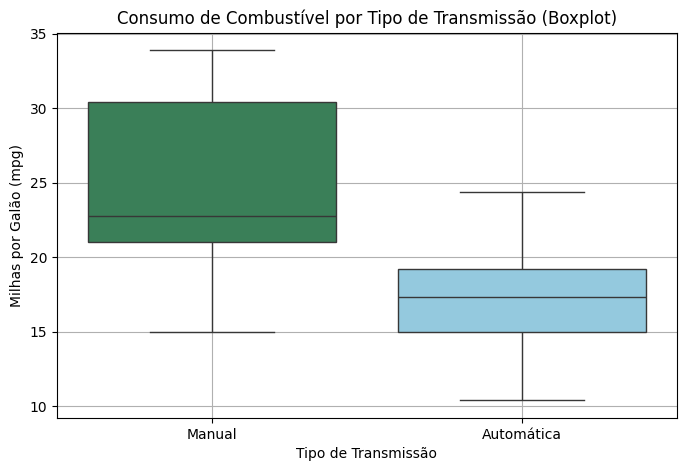

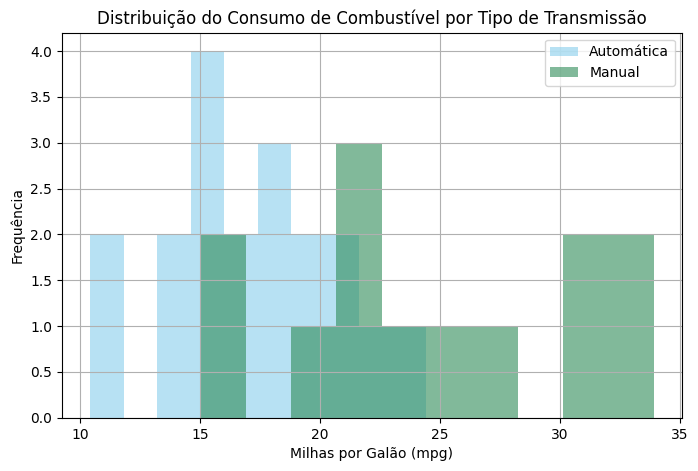

In [7]:
#definindo as cores fixas
cores = {'Automática': 'skyblue', 'Manual': 'seagreen'}

#criar nova coluna com rótulos para o gráfico
df_mtcars['Transmissão'] = df_mtcars['am'].map({0: 'Automática', 1: 'Manual'})

# 1 boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_mtcars, x='Transmissão', y='mpg', palette=cores)
plt.title('Consumo de Combustível por Tipo de Transmissão (Boxplot)')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Milhas por Galão (mpg)')
plt.grid(True)
plt.show()

# 2 histogramas sobrepostos
plt.figure(figsize=(8, 5))
plt.hist(auto['mpg'], bins=10, color=cores['Automática'], alpha=0.6, label='Automática')
plt.hist(manual['mpg'], bins=10, color=cores['Manual'], alpha=0.6, label='Manual')
plt.title('Distribuição do Consumo de Combustível por Tipo de Transmissão')
plt.xlabel('Milhas por Galão (mpg)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()


**Explicação:**

A análise gráfica revela diferenças claras no consumo médio de combustível entre veículos com transmissão automática e manual. O boxplot mostra que os carros com transmissão manual tendem a apresentar valores mais altos em milhas percorridas por galão, com uma mediana visivelmente superior à dos veículos automáticos. Além disso, a dispersão dos dados é um pouco maior no grupo manual. O histograma reforça essa observação, indicando que a maior parte dos veículos com transmissão manual concentra-se em faixas mais altas de consumo, enquanto os veículos com transmissão automática têm frequências maiores em faixas inferiores de mpg. Esses padrões sugerem que veículos com transmissão manual, em geral, são mais eficientes em termos de consumo de combustível

#### (ii) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [ ]:
alpha = 0.05
#separando os dados de mpg por tipo de transmissão
auto_mpg = df_mtcars[df_mtcars['am'] == 0]['mpg']
manual_mpg = df_mtcars[df_mtcars['am'] == 1]['mpg']

#reutilizando a função feita anteriormente
verificar_normalidade(auto_mpg, "Consumo - Transmissão Automática", alpha)
verificar_normalidade(manual_mpg, "Consumo - Transmissão Manual", alpha)



Verificando normalidade para: Consumo - Transmissão Automática
  Shapiro-Wilk       -> Estatística = 0.9768, p-valor = 0.8987
    Não rejeitamos H0: distribuição é aproximadamente normal.
  D’Agostino-Pearson -> Estatística = 0.0261, p-valor = 0.9870
    Não rejeitamos H0: distribuição é aproximadamente normal.

Verificando normalidade para: Consumo - Transmissão Manual
  Shapiro-Wilk       -> Estatística = 0.9458, p-valor = 0.5363
    Não rejeitamos H0: distribuição é aproximadamente normal.
  D’Agostino-Pearson -> Estatística = 1.3447, p-valor = 0.5105
    Não rejeitamos H0: distribuição é aproximadamente normal.


**Explicação:**

O código executa os testes de Shapiro e D'Agostino por meio da função feita em questão anterior verificar_normalidade(), que recebe como parâmetro a amostra, o nome da coluna e o valor de alpha. Nos dois testes, as duas amostras seguem uma distribuição normal.

#### (iii) Presumindo que os dados da coluna mpg seguem a distribuição normal, determine um intervalo de confiança no nível 95% da diferença entre as médias dos modelos de carros que possuem transmissão automática e os que possuem transmissão manual.

In [ ]:
# codigo

auto_mpg = auto['mpg']
manual_mpg = manual['mpg']

#estatísticas
media_auto = np.mean(auto_mpg)
media_manual = np.mean(manual_mpg)
dp_auto = np.std(auto_mpg, ddof=1)
dp_manual = np.std(manual_mpg, ddof=1)
n_auto = len(auto_mpg)
n_manual = len(manual_mpg)

#diferença de médias
dif_medias = media_manual - media_auto

#erro padrão
se = np.sqrt((dp_auto**2 / n_auto) + (dp_manual**2 / n_manual))

#graus de liberdade 
df = ((dp_auto**2 / n_auto) + (dp_manual**2 / n_manual))**2 / \
     (((dp_auto**2 / n_auto)**2) / (n_auto - 1) + ((dp_manual**2 / n_manual)**2) / (n_manual - 1))

# Valor crítico t*
t_crit = stats.t.ppf(0.975, df)

# Intervalo de confiança
lower = dif_medias - t_crit * se
upper = dif_medias + t_crit * se

print(f"Intervalo de confiança de 95% para a diferença das médias (Manual - Automática): ({lower:.4f}, {upper:.4f})")


Intervalo de confiança de 95% para a diferença das médias (Manual - Automática): (3.2097, 11.2802)


**Explicação:**

Como temos duas amostras não pareadas com variâncias desiguais, realizamos o Teste de Welch para t-teste independente. O intervalo de confiança é dado por:

$$
(\bar{x}_{manual} - \bar{x}_{automática}) \pm t^* \cdot \text{Erro Padrão}
$$

onde $t^*$ é o valor t-crítico, calculado a partir de t.ppf(0.975, df). df é o grau de liberdade, calculado por meio da fórmula:

$$
v = \frac{\left(\frac{(s_1)^2}{n_1} + \frac{(s_2)^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}
$$

pois temos duas amostras independentes.

####  (iv) Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que carros automáticos e manuais não apresentam a mesma eficiência relativa a consumo de combustível. Em particular, existe a suspeita de que carros com transmissão manual consumem (em média) menos combustível que suas contra-partidas com transmissão automática. Aplique um teste de hipóteses para verificar essa suspeita. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que são fornecidas duas amostras independentes. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 5%.

**Passo 1: Definir as hipóteses**

$H_0$: $\mu_{manual} \leq \mu_{automática}$ (manuais não são mais eficientes)

$H_1$: $\mu_{manual} > \mu_{automática}$ (manuais são mais eficientes)

**Passo 2: Computar a estatística de Teste**

Como as amostras são independentes (não pareadas), realizamos o t-teste não pareado, dado pelo teste de Welch:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }}
$$

**Passo 3: Computar o $p$-valor associado à estatística de teste**

 O cálculo do p-valor será feito com um teste unilateral a direita, pois $H_1$: $\mu_{manual} > \mu_{automática}$:

- **Teste unilateral à direita ($H_1: \mu > \mu_0$):**  
  $$ p\text{-valor} = P(T \geq t_{\text{calculado}}) = 1 - \text{t.cdf}(t_{\text{calculado}}, df) \text{ ou t.sf(t, df)}$$ 

Onde:
- `t_calculado` é a estatística de teste obtida -> t score
- `df` é o número de graus de liberdade da amostra ($n - 1$)

**Passo 4: Interpretar e declarar o resultado**

Se $p\text{-valor} < \alpha$, rejeitamos $H_0$.
Em caso contrário, falhamos em rejeitar $H_0$.



In [ ]:
# passo 2: computar a estatística t
t_welch = dif_medias / se

# passo 3: p-valor unilateral (manual consome menos → maior mpg → H1: μ_manual > μ_auto)
p_valor = stats.t.sf(t_welch, df)

#nivel de significância
alpha = 0.05

print(f"Estatística t de Welch: {t_welch:.4f}")
print(f"p-valor (unilateral): {p_valor:.4f}")

# passo 4: Decisão
if p_valor < alpha:
    print("Rejeitamos H0: há evidências de que carros com transmissão manual são mais eficientes.")
else:
    print("Não rejeitamos H0: não há evidências suficientes de que carros manuais são mais eficientes.")


Estatística t de Welch: 3.7671
p-valor (unilateral): 0.0007
Rejeitamos H0: há evidências de que carros com transmissão manual são mais eficientes.


**Explicação:**

O código executa os passos descritos anteriormente utilizando estatísticas computadas em bloco de código anterior. O t é calculado com dif_medias/se, onde a dif_medias é a diferença das médias e o se é o erro padrão. Como o teste é unilateral à direita, o p-valor foi calculado com t.sf(t_welch, df), função equivalente a 1-t.cdf(t_welch,df). O passo 4 foi realizado comparando p-valor < alpha. Como resultado, temos a rejeição da hipótese nula, pois há evidências de que carros manuais são mais eficientes.

# (4) Teste ANOVA

## (4.1) Situação-problema I

Nesta parte, você deve estudar as condições que permitem usar o método de análise de variância (ANOVA) para determinar se um grupo de populações tem uma média comum. Os dados apresentados nas figuras 1, 2 e 3 correspondem às estimativas de milhas percorridas por galão obtidas para amostras de modelos de carros de 1993, conforme relatado pelo Consumer Reports: The 1993 Cars- Annual Auto Issue (abril de 1993).

#### (i) Se uma ou mais das amostras não passam no teste de normalidade, então não podemos usar o método ANOVA. Sendo assim, antes de poder usar esse teste, você deve verificar as condições de aplicabilidade dele. Primeiro verifique, se as amostras são aproximadamente normalmente distribuídas. Em seguida, usando o teste de Levene, verifique se as amostras possuem variâncias iguais do ponto de vista estatístico.

In [3]:
# código

import numpy as np
from scipy import stats

# dados
compactos = np.array ([20, 25, 25, 20, 22, 22, 24, 26, 20, 24, 24, 23, 20, 23, 21, 21])
medios = np.array ([18, 19, 22, 22, 19, 16, 21, 21, 21, 20,17, 18, 18, 17, 19, 19, 18, 21, 23, 19, 22, 20])
grandes = np.array ([19, 16, 16, 17, 20, 20, 20, 18, 18, 19, 19, 15, 18, 17, 15, 18, 17, 18, 18, 17])
alpha = 0.05
# funçao para testar normalidade reutilizada de outra questao com ajustes
def verificar_normalidade2(amostra, nome, alpha=0.05):
    print(f"\nVerificando normalidade para: {nome}")

    # Teste de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(amostra)
    print(f"  Shapiro-Wilk       -> Estatística = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")
    if p_shapiro > alpha:
        print("    distribuição é aproximadamente normal.")
    else:
        print("    a distribuição não é normal.")

    # Teste de D’Agostino
    stat_dagostino, p_dagostino = stats.normaltest(amostra)
    print(f"  D’Agostino-Pearson -> Estatística = {stat_dagostino:.4f}, p-valor = {p_dagostino:.4f}")
    if p_dagostino > alpha:
        print("    distribuição é aproximadamente normal.")
    else:
        print("    a distribuição não é normal.")
    
# realizando os testes de normalidade
verificar_normalidade2(compactos, "Compactos", alpha)    
verificar_normalidade2(medios, "Médios", alpha)
verificar_normalidade2(grandes, "Grandes", alpha)

# realizando o teste de Levene
stat_levene, p_levene = stats.levene(compactos, medios, grandes)

print("\nTeste de Levene para Homogeneidade de Variâncias:")
print(f"Estatística de Levene: {stat_levene:.4f}")
print(f"P-valor: {p_levene:.4f}")
print("Homogeneidade de variâncias:", "Aceita H0 (variâncias iguais)" if p_levene > 0.05 else "Rejeita H0 (variâncias diferentes)")





Verificando normalidade para: Compactos
  Shapiro-Wilk       -> Estatística = 0.9143, p-valor = 0.1366
    distribuição é aproximadamente normal.
  D’Agostino-Pearson -> Estatística = 2.8809, p-valor = 0.2368
    distribuição é aproximadamente normal.

Verificando normalidade para: Médios
  Shapiro-Wilk       -> Estatística = 0.9590, p-valor = 0.4694
    distribuição é aproximadamente normal.
  D’Agostino-Pearson -> Estatística = 1.0995, p-valor = 0.5771
    distribuição é aproximadamente normal.

Verificando normalidade para: Grandes
  Shapiro-Wilk       -> Estatística = 0.9363, p-valor = 0.2041
    distribuição é aproximadamente normal.
  D’Agostino-Pearson -> Estatística = 0.4655, p-valor = 0.7923
    distribuição é aproximadamente normal.

Teste de Levene para Homogeneidade de Variâncias:
Estatística de Levene: 1.5446
P-valor: 0.2225
Homogeneidade de variâncias: Aceita H0 (variâncias iguais)


c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Explicação:** Para realizar o teste ANOVA, foram realizados os seguintes passos para avaliar se as condições de normalidade e homogeneidade são atendidas:

**1. Verificar a normalidade:** A normalidade foi verificada por meio da função verificar_normalidade2, que recebe a amostra, nome da amostra e o alpha (adaptada de outra questão). Com isso, é feito o teste de Shapiro e o de D'Agostinho. Se o p-valor for > alpha, a distribuição segue a normalidade. Para todas as amostras e todos os testes, verificou-se que a distribuição é aproximadamente normal.

**2. Teste de Levene:** Foi aplicado por meio da função stats.levene(compactos, medios, grandes) para verificar se as variâncias são estaticamente iguais (homogêneas). Foi constatado que as variâncias são iguais, pois o p-valor > alpha. 


####  (ii) Agora que você verificou as condições aplicabilidade do ANOVA, aplique esse teste para verificar a hipótese nula de que as três populações têm médias estatisticamente iguais. Declare as hipóteses nula e alternativa. A seguir, descreva sua conclusão. Use nível de significância de 5%.

In [ ]:
# código - teste ANOVA
#hipotese nula: as médias sao estatisticamente iguais
#hipotese alternativa: as médias sao diferentes
alpha = 0.05
# aplicando o ANOVA
_, p_valor_anova = stats.f_oneway(compactos, medios, grandes)
print(f"p-valor: {p_valor_anova}")
# verificar resultado
if p_valor_anova < 0.05:
    print("Resultado: Rejeita H0 – Pelo menos uma média difere.")
else:
    print("Resultado: Não rejeita H0 – As médias são estatisticamente iguais.")

p-valor: 1.1426698001297822e-09
Resultado: Rejeita H0 – Pelo menos uma média difere.


**Explicação:** O teste ANOVA foi realizado aplicando a função stats.f_oneway para calcular o p-valor. Como p-valor < alpha, então rejeitamos a hipótese nula, pois há evidências que há uma diferença nas médias.

## (4.2) Situação-problema II

#### Em http://www.flatworldknowledge.com/sites/all/files/data9.xls, você encontra dados que registram os custos dos materiais (livro didático, manual de solução, taxas de laboratório e assim por diante) em cada um dos dez cursos diferentes em cada um dos três assuntos diferentes, química, ciência da computação e matemática. Verifique, ao nível de significância de 1%, se os dados fornecem evidências suficientes para concluir que os custos médios nas três disciplinas não são todos iguais. Apresente os detalhes de aplicação todos os quatro passos do teste de hipóteses.

In [ ]:
# codigo
import pandas as pd
# leitura do arquivo
df_cursos = pd.read_excel("data9.xls")

# separar por disciplina
df_math = df_cursos[df_cursos['Cource'].str.contains("MATH")]
df_comp = df_cursos[df_cursos['Cource'].str.contains("COMP")]
df_chem = df_cursos[df_cursos['Cource'].str.contains("CHEM")]

alpha = 0.01
# custos
math_custos = df_math['Cost']
comp_custos = df_comp['Cost']
chem_custos = df_chem['Cost']

# teste de Levene para verificar homogeneidade
_, p_valor_lev = stats.levene(math_custos, comp_custos, chem_custos)
print("Homogeneidade de variâncias:", "Aceita H0 (variâncias iguais)" if p_valor_lev > 0.05 else "Rejeita H0 (variâncias diferentes)")
# teste ANOVA
f_stat, p_valor_anova = stats.f_oneway(math_custos, comp_custos, chem_custos)


#verificação com alpha = 0.01
print("Teste ANOVA: ")
print(f"estatística f: {f_stat}")
print(f"p-valor: {p_valor_anova}")
if p_valor_anova < 0.01:
    print("Resultado: Rejeita H0 – Há diferença significativa entre os custos médios das disciplinas.")
else:
    print("Resultado: Não rejeita H0 – Não há evidência suficiente de diferença entre os custos médios.")

    



Homogeneidade de variâncias: Aceita H0 (variâncias iguais)
Teste ANOVA: 
estatística f: 1.4180469170870271
p-valor: 0.25965356971440046
Resultado: Não rejeita H0 – Não há evidência suficiente de diferença entre os custos médios.


**Explicação:**

**Passo 1: Definir as hipóteses**

$H_0$: $\mu_{math} = \mu_{comp} = \mu_{chem}$ 

$H_1$: Pelo menos uma média difere.

**Passo 2: Computar a estatística de Teste**

A estatística de teste foi calculada por meio da função ```stats.f_oneway(math_custos, comp_custos, chem_custos)```

**Passo 3: Computar o $p$-valor associado à estatística de teste**
O p-valor foi calculado por meio da função ```stats.f_oneway(math_custos, comp_custos, chem_custos)```, que além de retornar a estatística de teste, também retorna o p-valor.

**Passo 4: Interpretar e declarar o resultado**

Se $p\text{-valor} < \alpha$, rejeitamos $H_0$.
Em caso contrário, falhamos em rejeitar $H_0$.

Como p-valor > alpha, nesse caso, falhamos em rejeitar H0 e afirmamos que não há evidência suficiente de diferença entre os custos médios.

# (5) Testes Qui-quadrado

## (5.1) Distribuição

Suponha que uma variável aleatória Y siga a distribuição χ2 com k graus de liberdade, isto é, Y ∼χ2 (k). Por meio das funções apropriadas de R1 ou de Python2, compute o que se pede a seguir. Considere que k = 13. 

In [1]:
from scipy.stats import chi2
k =13

#### (i) Pr(Y > 2,56)


In [2]:
pr = 1 - chi2.cdf(2.56, k)
print(f"i) {pr}")

i) 0.9991125857338248


**Explicação:** A probabilidade acumulada foi calculada por meio da função chi2.cdf, que recebe um valor crítico e os graus de liberade (k). Como queremos a probabilidade de valores acima de 2.56, subtraímos de 1 (100%).

####  (ii) Pr(2,56 < Y < 4,87)


In [23]:
pr = chi2.cdf(4.87, k) - chi2.cdf(2.56, k)
print(f"ii) {pr}")

ii) 0.021168183378387335


**Explicação:** A probabilidade acumulada foi calculada por meio da função chi2.cdf, que recebe um valor crítico e os graus de liberade (k). Como queremos a probabilidade de valores entre 2.56 e 4.87, calculamos a probabilidade de valores abaixo de 4.87 e subtraímos pela probabilidade de valores abaixo de 2.56, encontrando a área entre esses valores.

####  (iii) O valor de y tal que Pr(Y < y) = 0,95


In [24]:
y = chi2.ppf(0.95, k)
print(f"iii) {y}")

iii) 22.362032494826934


**Explicação:** O valor crítico (y) foi calculado por meio da função chi2.ppf, que recebe uma área e os graus de liberdade.

## (5.2) Teste χ2 (situação-problema I)

Considere novamente o conjunto de dados denominado mtcars. Para este conjunto de dados, descubra se as variáveis cyl e carb são ou não dependentes. Para isso, utilize o teste χ2. Apresente o desenvolvimento, isto é, os comandos em R ou Python que você utilizou para chegar à conclusão.

In [42]:
# codigo
from scipy.stats import chi2_contingency
#criando a tabela de contingencia
contingencia_tb = pd.crosstab(df_mtcars['cyl'], df_mtcars['carb'])
#aplicando qui-quadrado
chi2, p_valor, *_= chi2_contingency(contingencia_tb)

print("Resultado do teste qui-quadrado:")
print(f"Estatística chi2: {chi2:.4f}")
print(f"p-valor: {p_valor:.4f}")

alpha = 0.05
if p_valor < alpha:
    print("\nConclusão: As variáveis são dependentes (rejeitamos a Hipótese nula).")
else:
    print("\nConclusão: As variáveis são independentes (não rejeitamos a Hipótese nula).")



Resultado do teste qui-quadrado:
Estatística chi2: 24.3889
p-valor: 0.0066

Conclusão: As variáveis são dependentes (rejeitamos a Hipótese nula).


**Explicação:** Com pd.crosstab, criamos uma **tabela de contingência** que mostra os valores esperados para cada combinação de cyl e carb caso fossem independentes. Com ela, realizamos o teste qui-quadrado utilizando chi2_contingency, que retornou a estatística e o p-valor. Como o p-valor obtido < alpha (0.05), temos a rejeição da hipótese nula, ou seja, as variáveis são dependentes.

## (5.3) Teste χ2 (situação-problema II)

A fabricante das balinhas Zuzuba produz balinhas de diferentes cores. Esse fabricante alega que cada pacote produzido contém quantidades de balinhas de cada cor que não diferem significativamente das que são apresentadas na segunda coluna da tabela Tabela 1. Para testar essa alegação, um auditor comprou um pacote de Zuzubas em uma loja perto de sua casa e contou as quantidades de cada cor. Os dados levantados pelo auditor estão na terceira coluna da Tabela 1. Se o fabricante estiver correto, então não deve haver diferença significativa entre as quantidades de diversas cores de Zuzubas que ela alega depositar em cada pacote e as quantidades que o auditor encontrou.

| Cor      | Esperado | Observado |
|----------|----------|-----------|
| Vermelho | 18       | 24        |
| Verde    | 19       | 16        |
| Roxo     | 16       | 13        |
| Azul     | 6        | 20        |
| Laranja  | 24       | 20        |
| Amarelo  | 17       | 14        |

 Tabela 1: Valores esperados e observados para diferentes cores de balinhas Zuzuba.

####  (i) Utilizando o R ou Python, apresente dois gráficos de setores (pie charts), um para as quantidades esperadas e outro para as quantidades observadas de cores.

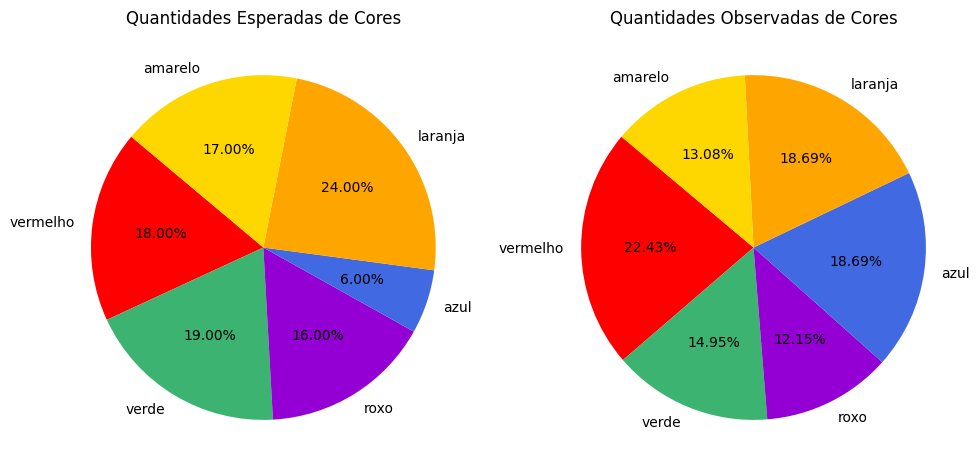

In [ ]:
#codigo
import matplotlib.pyplot as plt

cores = ['vermelho', 'verde', 'roxo', 'azul', 'laranja', 'amarelo']
esperado = [18, 19, 16, 6, 24, 17]
observado = [24, 16, 13, 20, 20, 14]

#mapeando para organizar as cores do grafico pela cor correspondente
cores_grafico = ['red', 'mediumseagreen', 'darkviolet', 'royalblue', 'orange', 'gold']

#graficos
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

#esperado
axs[0].pie(esperado, labels=cores, autopct='%1.2f%%', startangle=140, colors=cores_grafico)
axs[0].set_title("Quantidades Esperadas de Cores")

#observado
axs[1].pie(observado, labels=cores, autopct='%1.2f%%', startangle=140, colors=cores_grafico)
axs[1].set_title("Quantidades Observadas de Cores")

plt.tight_layout()
plt.show()


**Explicação:** São criados arrays de cores, esperados e observados para o plot dos gráficos, que ocorre por meio de plt.subplots(1, 2, figsize=(10, 7)). Com isso, fazemos a definição do gráfico de quantidade esperadas de cores e do gráfico de quantidades observadas de cores para cada subplot.

#### (ii) Também utilizando R ou Python, teste a hipótese nula de que a alegação do fabricante é verdadeira, usando nível de significância α = 0,05. Apresente os seguintes valores: graus de liberdade, valor da estatística e o valor-p. Apresente também a sua conclusão, contra ou a favor da hipótese nula, justificando sua resposta.

In [ ]:
#codigo 

#passando os dados p tabela p usar chi2_contingency
tb_balas = pd.DataFrame([esperado, observado], columns=cores, index=['Esperado', 'Observado'])

#teste
chi2, p_valor, dof, _ = chi2_contingency(tb_balas)

print(f"Estatística chi2: {chi2:.4f}")
print(f"P-valor: {p_valor:.4f}")
print(f"Graus de liberdade: {dof}")

alpha = 0.05
if p_valor < alpha:
    print("\nConclusão: As variáveis são dependentes (rejeitamos a Hipótese nula).")
else:
    print("\nConclusão: As variáveis são independentes (não rejeitamos a Hipótese nula).")

Estatística chi2: 9.3911
P-valor: 0.0944
Graus de liberdade: 5

Conclusão: As variáveis são independentes (não rejeitamos a Hipótese nula).


**Explicação:** Primeiro, passamos os dados dos 3 arrays para um dataframe para utilizarmos a função chi2_contingency, que retornou a estatística chi2, o p-valor e o dof (graus de liberdade). Como o p-valor é MAIOR que o alpha, não rejeitamos a hipótese nula, ou seja, as quantidades de cores são independentes.

##  (5.4) Teste χ2 (situação-problema III)

Considere um caso hipotético em que se deseja testar a eficácia de um medicamento para um determinado problema médico. Suponha que temos 105 pacientes em estudo e 50 deles foram tratados com a droga. Os restantes 55 pacientes foram mantidos como amostras de controle. O estado de saúde de todos os pacientes foi verificado após uma semana. Os dados e resultados para todos esse indivíduos podem ser encontrados no arquivo treatment.csv. A tabela de contingência para o conjunto de dados fornecido pode ser produzida por meio dos comandos na Listagem 2 e na Listagem 3.

Listing 2 - R
```R
 url <- "treatment.csv"
 df <- read.csv(url)
 tbl = table(df$treatment, df$improvement)
```
Listing 3 - Python
```Python
import pandas as pd
 data = pd.read_csv('treatment.csv')
 data_crosstab = pd.crosstab(data['treatment'],
 data['improvement'],
 margins = False)
 print(data_crosstab)
```
Nesta situação problema, temos duas variáveis discretas, uma que indica se o paciente foi tratado com o medicamento (treated ou not-treated), e outra que indica se o paciente melhorou ou não (improved ou not-improved) Utilizando R ou Python, verifique a alegação de que as duas variáveis são dependentes, usando nível de significância α = 0,05



In [51]:
#codigo
df_trat = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/treatment.csv")

#tabela de contingencia
contingencia = pd.crosstab(df_trat['treatment'], df_trat['improvement'], margins= False)
print("Tabela de Contingência:")
print(contingencia)
#teste
chi2, p_valor, *_ = chi2_contingency(contingencia)

print(f"\nEstatística chi2: {chi2:.4f}")
print(f"P-valor: {p_valor:.4f}")

alpha = 0.05
if p_valor < alpha:
    print("\nConclusão: As variáveis são dependentes (rejeitamos a Hipótese nula).")
else:
    print("\nConclusão: As variáveis são independentes (não rejeitamos a Hipótese nula).")



Tabela de Contingência:
improvement  improved  not-improved
treatment                          
not-treated        26            29
treated            35            15

Estatística chi2: 4.6626
P-valor: 0.0308

Conclusão: As variáveis são dependentes (rejeitamos a Hipótese nula).


**Explicação:** O teste foi realizado com chi2_contingency, passando a tabela de contingencia como parâmetro. Com isso, obtemos um p-valor menor que alpha, então rejeitamos a hipótese nula pois as variáveis são dependentes. 

## (5.5) Teste χ2 (situação-problema IV)

Em http://www.flatworldknowledge.com/sites/all/files/data4.xls, está disponível um conjunto de dados que registra o resultado de 500 arremessos de um dado de seis lados.Verifique, ao nível de significância de 10%, se há evidência suficiente para concluir que o dado não é “justo” (ou “balanceado”), ou seja, que a distribuição de probabilidade difere da probabilidade 1/6 para cada das seis faces do dado. Forneça a descrição detalhada dos quatro passos de aplicação do teste.

In [53]:
df = pd.read_excel("data4.xls")

#qts vezes cada face do dado saiu
observado = df['Die Result'].value_counts().sort_index()
observado_array = observado.to_numpy().reshape(1, -1)

#freq esperada se o dado for justo
total_lancamentos = observado.sum()
esperado_array = [[total_lancamentos / 6] * 6]

#teste
chi2, p_valor, dof, esperado = chi2_contingency(observado_array)

print("Frequências observadas:")
print(observado)

print("\nFrequências esperadas (se o dado for justo):")
print(pd.Series(esperado[0], index=observado.index))

print(f"\nEstatística chi2: {chi2:.4f}")
print(f"P-valor: {p_valor:.4f}")

alpha = 0.10
if p_valor < alpha:
    print("\nRejeitamos H₀: há evidência de que o dado NÃO é justo.")
else:
    print("\nNão rejeitamos H₀: não há evidência suficiente para afirmar que o dado é injusto.")


Frequências observadas:
Die Result
1    80
2    97
3    81
4    82
5    77
6    83
Name: count, dtype: int64

Frequências esperadas (se o dado for justo):
Die Result
1    80.0
2    97.0
3    81.0
4    82.0
5    77.0
6    83.0
dtype: float64

Estatística chi2: 0.0000
P-valor: 1.0000

Não rejeitamos H₀: não há evidência suficiente para afirmar que o dado é injusto.


**Explicação:**

**Passo 1: Definir as hipóteses**

$H_0$: As frequências seguem uma distribuição uniforme -> o dado é justo/balanceado

$H_1$: As frequências não seguem uma distribuição uniforme -> o dado não é justo/balanceado

**Passo 2: Computar a estatística de Teste χ2**

A estatística de teste foi calculada por meio da função ```chi2_contingency(observado_array)```.

**Passo 3: Computar o $p$-valor associado à estatística de teste χ2**
O p-valor foi calculado por meio da função ```chi2_contingency(observado_array)```, que além de retornar a estatística de teste, também retorna o p-valor.

**Passo 4: Interpretar e declarar o resultado**

Se $p\text{-valor} < \alpha$, rejeitamos $H_0$.
Em caso contrário, falhamos em rejeitar $H_0$.

Como p-valor > alpha, nesse caso, falhamos em rejeitar H0 e afirmamos que o dado é justo.

Além disso, a função chi2_contingency(observado_array) também retorna uma tabela de frequência esperada. É possível comparar as duas tabelas (observados e esperados) e inferir, também, que não há diferença entre as frequências, evidenciando, mais uma vez, que o dado é justo/balanceado.

# (6) Teste de Permutação

A Figura 4 mostra os resultados de um experimento no qual 7 de 16 camundongos foram selecionados aleatoriamente para receber um novo tratamento médico, enquanto os 9 restantes foram atribuídos ao grupo sem tratamento (controle). O tratamento tinha como objetivo prolongar a sobrevivência após uma cirurgia de teste. Em particular, a coluna “Data” mostra o tempo de sobrevivência após a cirurgia, em dias, para todos os 16 camundongos. Essa mesma figura também apresenta, para cada amostra: tamanho, média, desvio padrão. Utilize o teste de permutação para responder à seguinte pergunta de pesquisa (use nível de significância igual a 5%): O tratamento prolongou a sobrevivência?. Você deve apresentar a declaração das hipóteses, descreva como calculou a estatística de teste e o p-valor, a finalmente apresente sua conclusão.

**Declaração das hipóteses:**

$H_0$: o tratamento não tem efeito sobre a sobrevivência. $\mu{_{tratamento}} = \mu{_{controle}}$

$H_1$: O tratamento prolonga a sobrevivência. $\mu{_{tratamento}} > \mu{_{controle}}$

In [ ]:
#codigo teste unilateral
import numpy as np

#dados
#tratamento
tratamento = np.array([94,197,16,38,99,141,23])
#controle
controle = np.array([52,104,146,31,50,10,40,27,46])

#dif de medias
diferenca = np.mean(tratamento) - np.mean(controle)

#teste de permutacao
n_permutations = 10000
dados = np.concatenate([tratamento, controle]) #unico array
n_tratamento = len(tratamento)

diferencas = []
for _ in range(n_permutations):
    np.random.shuffle(dados) #embaralha
    grupo_tratado = dados[:n_tratamento] #pega primeiros n_tratamento valores como grupo tratado
    grupo_controle = dados[n_tratamento:] #pega resto como controle
    diferencas.append(np.mean(grupo_tratado) - np.mean(grupo_controle)) #dif de medias


p_valor = np.mean(np.array(diferencas) >= diferenca)

print(f"Diferença observada de médias: {diferenca:.2f}")
print(f"P-valor: {p_valor:.4f}")


alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos a hipótese nula: evidência de que o tratamento prolongou a sobrevivência.")
else:
    print("Não rejeitamos a hipótese nula: sem evidência suficiente de que o tratamento funcionou.")


Diferença observada de médias: 30.63
P-valor: 0.1404
Não rejeitamos a hipótese nula: sem evidência suficiente de que o tratamento funcionou.


**Explicação:** Foi realizado um teste de permutação unilateral, pois as hipóteses são sobre médias iguais ou um grupo com média maior que o outro. 

O teste de permutação foi realizado com 10000 iterações, inserindo os dados em um único array inicialmente. Com isso, dentro de um loop, os dados foram embaralhados e os grupos foram obtidos (tratado e controle). Após isso, em cada iteração, foi calculada a diferença entre as médias de cada grupo (tratado - controle). Essa diferença foi inserida em um array de diferenças de médias. 

Ao final das iterações, o **p-valor** foi calculado com a proporção de permutações com diferença de média >= à média observada de 30.63. 

**Conclusão:** Como p-valor é maior que alpha, não rejeitamos a hipótese nula. Podemos inferir, então, que não há evidência suficiente de que o tratamento prolongou a vida dos camundongos. 

# (7) Bootstrap

Essa parte do trabalho é uma adaptação do Problema 9 na seção 5.4 de An Introduction to Statistical Learning6. O conjunto de dados usado aqui é o denominado Boston. Uma descrição desse conjunto de dados pode ser encontrada em http://lib.stat.cmu.edu/datasets/boston.

#### (i) Com base neste conjunto de dados, forneça uma estimativa pontual para a média populacional da variável medv. Chame essa estimativa û.

In [6]:
#codigo

df_boston = pd.read_csv("Boston.csv", sep=',', index_col=0)
df_medv = df_boston["medv"]
mu_hat = df_medv.mean()

print(f"Estimativa pontual para a média populacional de medv: {mu_hat}")

Estimativa pontual para a média populacional de medv: 22.532806324110677


**Explicação:** O código lê o dataset, e separa a coluna de medv para obtenção da média, que é calculada com df_medv.mean(), proveninete de np.mean().

####  (ii) Forneça uma estimativa do erro padrão de ˆ µ. Interprete o resultado.


In [9]:
#codigo

n = len(df_medv)
sigma = df_medv.std()

erro_padrao = sigma/np.sqrt(n)

print(f"Estimativa do erro padrão: {erro_padrao}")



Estimativa do erro padrão: 0.40886114749753505


**Explicação:** Primeiro, obtemos o tamanho da amostra com len() e obtemos o desvio padrão (sigma) com np.std(). Com isso, calculamos o erro padrão seguindo a fórmula:

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$


####  (iii) Agora estime o erro padrão de ˆ µ usando o método Bootstrap. Como essa estimativa se compara com sua resposta de (ii)?

In [18]:
#codigo

#bootstrap
np.random.seed(42)
n_bootstrap = 10000 #qtd de iteracoes
medias = []

#amostragem com bootstrap
for _ in range(n_bootstrap):
    amostra = df_medv.sample(frac=1, replace=True)  #amostra com reposicao
    medias.append(amostra.mean())

# calculando erro padrao
erro_padrao_bootstrap = np.std(medias)

print(f"Erro padrão estimado via Bootstrap: {erro_padrao_bootstrap}")

diferenca = abs(erro_padrao_bootstrap - erro_padrao)
print(f"Diferença entre as estimativas: {diferenca}")


Erro padrão estimado via Bootstrap: 0.4051470768150291
Diferença entre as estimativas: 0.0037140706825059544


**Explicação:** Para estimar o erro via Bootstrap, executamos 10000 iterações. Cada uma coleta uma amostra com reposição do df_medv e insere as médias em um array de médias. Ao final de todas as iterações, calculamos o desvio padrão com np.std(). Comparando com a estimativa feita na questão (ii), obtemos uma diferença de cerca de 0.0037, não sendo muito significativa.

#### (iv) Com base em sua estimativa de bootstrap de (iii), forneça um intervalo de confiança de 95% para a média de medv. Compare-o com os resultados obtidos usando t-test sobre o atributo medv.

In [26]:
from scipy.stats import t
import numpy as np

#IC com bootstrap
ic_inferior = np.percentile(medias, 2.5)
ic_superior = np.percentile(medias, 97.5)
print(f"IC 95% Bootstrap: ({ic_inferior:.4f}, {ic_superior:.4f})")

#IC com t-test
ic_t = t.interval(confidence=0.95, df=n-1, loc=mu_hat, scale=sigma / np.sqrt(n))
print(f"IC 95% t-test: ({ic_t[0]:.4f}, {ic_t[1]:.4f})")


IC 95% Bootstrap: (21.7700, 23.3577)
IC 95% t-test: (21.7295, 23.3361)


**Explicação:** O intervalo de confiança por Bootstrap foi feito com np.percentile, passando a média e os limites inferior e superior. Para obter o intervalo com t-test, foi utilizada a função t.interval, passando o nível de confiança, graus de liberdade, média e erro padrão. 

Comparando:

| Aspecto              | Bootstrap                        | t-test                             |
|----------------------|----------------------------------|------------------------------------|
| Intervalo            | (21.7700, 23.3577)               | (21.7295, 23.3361)                 |
| Largura do intervalo | ~1.5877                          | ~1.6066                            |
| Assunções            | Não assume normalidade           | Assume distribuição normal         |
| Método               | Reamostragem com reposição       | Baseado na distribuição t de Student |

Com isso, temos que o intervalo do bootstrap é levemente deslocado para cima, sendo um pouco mais estreito, pois é calculado o erro empírico com base na variabilidade de amostragens, podendo suavizar extremos. Ainda assim, os intervalos são semelhantes, o que valida a robustez da estimativa via Bootstrap.

#### (v) Com base neste conjunto de dados, forneça uma estimativa, $û_{med}$, para a mediana populacional de medv.

In [27]:
#codigo

mu_hat_mediana = df_medv.median()
print(f"Estimativa para a mediana populacional de mdev: {mu_hat_mediana}")

Estimativa para a mediana populacional de mdev: 21.2


**Expliação:** Para calcular a mediana, foi utilizada função np.median().

####  (vi) Agora você deve estimar o erro padrão de $û_{med}$. Infelizmente, não há uma fórmula simples para calcular o erro padrão da mediana. Em vez disso, estime o erro padrão da mediana usando o método bootstrap. Comente suas descobertas.

In [30]:
#codigo

np.random.seed(42)
medianas_bootstrap = []

for _ in range(n_bootstrap):
    amostra = np.random.choice(df_medv, size=n, replace=True)
    mediana_amostra = np.median(amostra)
    medianas_bootstrap.append(mediana_amostra)

erro_padrao_mediana = np.std(medianas_bootstrap, ddof=1)
print(f"Erro padrão da mediana (via Bootstrap): {erro_padrao_mediana:.4f}")

Erro padrão da mediana (via Bootstrap): 0.3770


**Explicação:** Para estimar o erro padrão da mediana, foram utilizadas 10000 iterações com coletas de amostras com reposição. Para cada amostra, foi obtida a mediana, que foi inserida no array de medianas. Ao final, foi calculado o erro padrão das medianas do array com np.std().

O erro padrão obtido é uma representação da variabilidade da mediana em amostras repetidas da população. Como não há fórmula simples apra calcular o erro padrão da median, o método Bootstrap se mostra uma ótima alternativa para esse fim.

#### (vii) Forneça uma estimativa para o décimo percentil do atributo medv. Chame essa quantidade de $û_{0.1}$.

In [32]:
#codigo

mu_0_1 = np.percentile(df_medv, 10)
print(f"Estimativa para o décimo percentil de medv: {mu_0_1}")


Estimativa para o décimo percentil de medv: 12.75


**Explicação:** Para calcular o décimo percentil, foi utilizada a função np.percentile, passando o df_medv e o valor 10.

#### (viii) Use o método bootstrap para estimar o erro padrão de $û_{0.1}$. Comente suas descobertas.

In [33]:
#codigo

percentis_10 = []

for _ in range(n_bootstrap):
    amostra = np.random.choice(df_medv, size=len(df_medv), replace=True)
    percentis_10.append(np.percentile(amostra, 10))

percentis_10 = np.array(percentis_10)
erro_padrao_p10 = percentis_10.std()

print(f"Estimativa do erro padrão para û_0.1: {erro_padrao_p10}")


Estimativa do erro padrão para û_0.1: 0.5051002015442084


**Explicação:** Foi realizado o mesmo método bootstrap com 10000 iterações. Para cada amostra, foi obtido o 10º percentil e inserido no array de percentis. Com isso, foi calculado o erro sob esse array com np.std(). 

#  (8) Teste de Permutação vs Bootstrap

Uma empresa quer saber se é eficiente ensinar novas ferramentas aos seus funcionários usando cursos pela internet. A empresa seleciona aleatoriamente 7 trabalhadores e os atribui a dois grupos de tamanhos 4 e 3. O primeiro grupo frequentou aulas tradicionais, e o segundo frequentou cursos pela internet. Após a realização dos cursos, foi aplicado um teste aos trabalhadores, cujos resultados foram:

- Cursos na Internet: 37, 49, 55, 57
- Cursos tradicionais: 23, 31, 46

Verifique se os cursos da Internet são mais efetivos do que os cursos tradicionais. Para isso, aplique um teste de permutação e um teste de bootstrap. Use o nível de significância α = 0.1. Os dois testes levam à mesma conclusão?

In [49]:
import numpy as np

#dados
internet = np.array([37, 49, 55, 57])
tradicional = np.array([23, 31, 46])
obs_diff = internet.mean() - tradicional.mean()
iteracoes = 10000
alpha = 0.1

#teste de permutação
np.random.seed(42)
dados = np.concatenate([internet, tradicional])
diffs = []

for _ in range(iteracoes):
    np.random.shuffle(dados)
    grupo1 = dados[:4]
    grupo2 = dados[4:]
    diffs.append(grupo1.mean() - grupo2.mean())

diffs = np.array(diffs)
p_valor_perm = np.mean(diffs >= obs_diff)

print("------------------PERMUTAÇÃO--------------------")
print(f"Diferença observada: {obs_diff:.2f}")
print(f"p-valor: {p_valor_perm:.4f}")
if p_valor_perm < alpha:
    print("Rejeitamos H0: Evidência de que cursos online são mais eficazes.")
else:
    print("Não rejeitamos H0: Sem evidência suficiente de eficácia maior dos cursos online.")

#teste bootstrap
boot_diffs = []

for _ in range(iteracoes):
    grupo_internet = np.random.choice(internet, size=len(internet), replace=True)
    grupo_trad = np.random.choice(tradicional, size=len(tradicional), replace=True)
    boot_diffs.append(grupo_internet.mean() - grupo_trad.mean())

boot_diffs = np.array(boot_diffs)
p_valor_boot = np.mean(boot_diffs <= 0)

print("\n------------------BOOTSTRAP--------------------")
print(f"Diferença observada: {obs_diff:.2f}")
print(f"p-valor: {p_valor_boot:.4f}")
if p_valor_boot < alpha:
    print("Rejeitamos H0: Evidência de que cursos online são mais eficazes.")
else:
    print("Não rejeitamos H0: Sem evidência suficiente de eficácia maior dos cursos online.")


------------------PERMUTAÇÃO--------------------
Diferença observada: 16.17
p-valor: 0.0630
Rejeitamos H0: Evidência de que cursos online são mais eficazes.

------------------BOOTSTRAP--------------------
Diferença observada: 16.17
p-valor: 0.0123
Rejeitamos H0: Evidência de que cursos online são mais eficazes.


**Explicação:**

Foram aplicados dois testes não paramétricos — permutação e bootstrap — para verificar se cursos online resultam em notas maiores do que cursos tradicionais.

No teste de **permutação**, os dados foram embaralhados repetidamente e divididos em dois grupos para simular a diferença de médias sob a hipótese nula. 
 
No **bootstrap**, os grupos foram reamostrados com reposição para estimar a distribuição da diferença de médias. 
 
Em ambos os casos, o p-valor foi calculado para avaliar se a diferença observada poderia ocorrer ao acaso. Como o p-valor de ambos é menor que alpha (0.1), a conclusão foi de rejeitar H0, tendo evidência de que cursos online são mais eficazes. Sendo assim, afirmamos que os dois testes levam à mesma conclusão.



